In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_reg_train = df_ames_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add','SalePrice']]

In [4]:
df_ames_reg_train.shape

(2051, 8)

In [5]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [6]:
df_ames_reg_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df_ames_reg_train.isna().sum()

Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [8]:

X = df_ames_reg_train[['Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add']]
y = df_ames_reg_train['SalePrice']
    

I checked some other Linear Regression models before I settled on this one.  I looked at only using Overall Qual and Neighborhood as categorical variables, and that model didn't perform as well as this one.  I dropped the Overall Quality feature because when I coded it as a categorical variable, the levels didn't line up in importance in the model as I expected.  I also dropped the Full Bath because it showed up with a negative coefficient in my Linear Regression Model, and that didn't make sense to me either.  As I was cleaning up these code notebooks, I realized that the Full Bath feature was very highly correlated with Gr Liv Area, so the multicollinearity was throwing off the Full Bath coefficient.

In [9]:
X.shape

(2049, 7)

In [10]:
y.shape

(2049,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.dtypes

Neighborhood       object
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [13]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [14]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [15]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [16]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [17]:
preds= pipe3.predict(X_test)

In [18]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [19]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Gr Liv Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add'], dtype=object)

In [20]:
pipe3.named_steps['linearregression'].coef_

array([-1392.48235691,  -771.36496734, -1914.39101028, -1164.8809356 ,
        1725.49567492,  -989.52535266,  4216.26948584, -5025.35702908,
       -2872.035375  ,  -134.45172225,  3962.96604006, -3380.40890257,
        -922.66467191, -3123.59772979, -2905.54669597, -3357.69509309,
       -2071.66812184, -1937.60105604,  7168.81430857, 15267.72146263,
       -5017.84493765, -1511.82331125, -2836.56587764, -2916.64810009,
        1771.54597278, 12648.20144978,  3472.79763568,  2541.72474667,
       27304.45702988, 11250.46939834, 11796.54565548,  2863.2790983 ,
        9608.57173232, 10082.46674995])

In [21]:
df_simpl_reg = pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))
df_simpl_reg

,0,1
0,Neighborhood_Blmngtn,-1392.482357
1,Neighborhood_Blueste,-771.364967
2,Neighborhood_BrDale,-1914.391010
3,Neighborhood_BrkSide,-1164.880936
4,Neighborhood_ClearCr,1725.495675
5,Neighborhood_CollgCr,-989.525353
6,Neighborhood_Crawfor,4216.269486
7,Neighborhood_Edwards,-5025.357029
8,Neighborhood_Gilbert,-2872.035375
9,Neighborhood_Greens,-134.451722


In [22]:
df_simpl_reg.to_csv('./datasets/simplereg.csv', index = False)

In [23]:
residuals = preds - y_test
residuals

1787   -45605.028006
1579    21061.546012
551     -9829.221718
839     10879.730356
181      1674.873123
            ...     
1481     2946.430549
92      -9037.932963
1814    10924.561127
950     -9215.952831
1230   -12958.058783
Name: SalePrice, Length: 513, dtype: float64

In [24]:
#Evaluate my metrics
print('Linear Regression Model #5 w/Neighborhood, No Full Bath & More: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #5 w/Neighborhood, No Full Bath & More: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #5 w/Neighborhood, No Full Bath & More: R2:', r2_score(y_test, preds))

Linear Regression Model #5 w/Neighborhood, No Full Bath & More: MAE: 22009.88121430146
Linear Regression Model #5 w/Neighborhood, No Full Bath & More: MSE: 982918626.7458577
Linear Model #5 w/Neighborhood, No Full Bath & More: R2: 0.8214096469284378


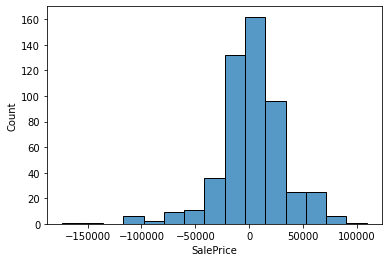

In [25]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

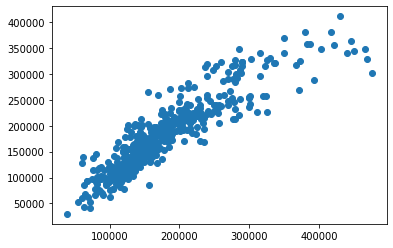

In [26]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

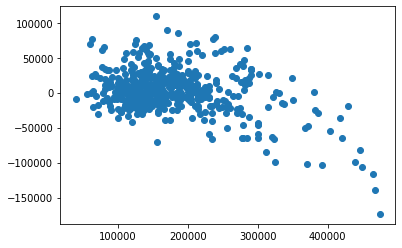

In [27]:
plt.scatter(y_test, residuals);
